In [1]:
#scrapper
!pip install snscrape

In [2]:
# pour l'nalyse des sentiments russes
! pip install pymystem3

In [3]:
# pour creer des animations
! pip install celluloid

In [4]:
#pour l'analyse des sentiments en anglais
!pip install afinn

In [5]:
# nuage des mots
!pip install wordcloud

In [6]:
! pip install dostoevsky

In [7]:
%%bash python -m dostoevsky download fasttext-social-network-model

UsageError: %%bash is a cell magic, but the cell body is empty.


In [8]:
import snscrape.modules.twitter as scpt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from celluloid import Camera
from afinn import Afinn

pd.set_option("display.max_colwidth", -1)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6980/3330702222.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


# scraper les données 

In [9]:
# fonction vraissemblable à celle de print de python
def pretty(d, indent=0):
    for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

In [10]:
# query ="(#Ukraine) since:2022-02-24"

# tweets = []
# limits =10000
# limit_add=50

# for tweet in scpt.TwitterSearchScraper(query).get_items():

#     print(vars(tweet)) 
#     if len(tweets)==limits :
#         break
#     if len(tweets)==limit_add :
#         df = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
#                                         'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
#         df.to_csv('sentiments_uk.csv', mode='a', header=False)
#         tweets = []
#     else:
#         tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
#                     tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
#                     tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
    


### Methode 2 Scraping
cette methode est plus simple et plus rapide à executer, les resultats sont directement envoyés dans le fichier "tweets_uk.json"

In [11]:
# %%bash snscrape --jsonl --progress --max-results 1000000 --since 2021-01-01 twitter-search "(#Ukraine) since:2022-02-24" > tweets_uk.json

# Mise en forme des données

In [12]:
df=pd.read_json("tweets_uk.json",lines=True)

In [13]:
username=[]
displayname=[]
description=[]
created=[]
location=[]
mediaCount=[]
listedCount=[]
favouritesCount=[]
statusesCount=[]
friendsCount=[]
followersCount=[]

for user in df.user:
    
    username.append(user['username'])
    displayname.append(user['displayname'])
    description.append(user['description'])
    created.append(user['created'])
    location.append(user['location'])
    mediaCount.append(user['mediaCount'])
    listedCount.append(user['listedCount'])
    favouritesCount.append(user['favouritesCount'])
    statusesCount.append(user['statusesCount'])
    friendsCount.append(user['friendsCount'])
    followersCount.append(user['followersCount'])
df['username']=username
df['displayname']=displayname
df['description']=description
df['created']=created
df['mediaCount']=mediaCount
df['listedCount']=listedCount
df['favouritesCount']=favouritesCount
df['statusesCount']=statusesCount
df['friendsCount']=friendsCount
df['followersCount']=followersCount
df['location']=location

df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
0,snscrape.modules.twitter.Tweet,https://twitter.com/MagyarIgazsag/status/1526196373867069440,2022-05-16 13:42:25+00:00,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,1526196373867069440,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MagyarIgazsag', 'id': 1520424478538407937, 'displayname': 'Magyar Igazság', 'description': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. instagram.com/magyarigazsag', 'rawDescription': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. https://t.co/u1PMPop0m5', 'descriptionUrls': [{'text': 'instagram.com/magyarigazsag', 'url': 'https://www.instagram.com/magyarigazsag', 'tcourl': 'https://t.co/u1PMPop0m5', 'indices': [80, 103]}], 'verified': False, 'created': '2022-04-30T15:27:16+00:00', 'followersCount': 11, 'friendsCount': 12, 'statusesCount': 73, 'favouritesCount': 32, 'listedCount': 0, 'mediaCount': 73, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1520424690447228928/tzuuegmW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1520424478538407937/1652373626', 'label': None, 'url': 'https://twitter.com/MagyarIgazsag'}",0,0,0,...,Magyar Igazság,A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal.\n\ninstagram.com/magyarigazsag,2022-04-30T15:27:16+00:00,73,0,32,73,12,11,
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir,"Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.",2013-0

In [14]:
# verification de valeurs manquantes
df.isna().sum().sort_values(ascending=False)

retweetedTweet      100000
cashtags            99831 
place               97333 
coordinates         97331 
inReplyToUser       85240 
inReplyToTweetId    85240 
quotedTweet         84253 
mentionedUsers      74916 
media               70255 
outlinks            56842 
tcooutlinks         56842 
hashtags            1     
listedCount         0     
mediaCount          0     
created             0     
description         0     
displayname         0     
favouritesCount     0     
statusesCount       0     
friendsCount        0     
followersCount      0     
username            0     
_type               0     
url                 0     
sourceLabel         0     
sourceUrl           0     
source              0     
lang                0     
conversationId      0     
quoteCount          0     
likeCount           0     
retweetCount        0     
replyCount          0     
user                0     
id                  0     
renderedContent     0     
content             0     
d

In [15]:
df.drop(columns=['tcooutlinks',  'outlinks', 'media', 'mentionedUsers', 'quotedTweet', 'inReplyToTweetId', 
                 'inReplyToUser', 'coordinates', 'place', 'cashtags', 'retweetedTweet'])

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
0,snscrape.modules.twitter.Tweet,https://twitter.com/MagyarIgazsag/status/1526196373867069440,2022-05-16 13:42:25+00:00,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,1526196373867069440,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MagyarIgazsag', 'id': 1520424478538407937, 'displayname': 'Magyar Igazság', 'description': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. instagram.com/magyarigazsag', 'rawDescription': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. https://t.co/u1PMPop0m5', 'descriptionUrls': [{'text': 'instagram.com/magyarigazsag', 'url': 'https://www.instagram.com/magyarigazsag', 'tcourl': 'https://t.co/u1PMPop0m5', 'indices': [80, 103]}], 'verified': False, 'created': '2022-04-30T15:27:16+00:00', 'followersCount': 11, 'friendsCount': 12, 'statusesCount': 73, 'favouritesCount': 32, 'listedCount': 0, 'mediaCount': 73, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1520424690447228928/tzuuegmW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1520424478538407937/1652373626', 'label': None, 'url': 'https://twitter.com/MagyarIgazsag'}",0,0,0,...,Magyar Igazság,A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal.\n\ninstagram.com/magyarigazsag,2022-04-30T15:27:16+00:00,73,0,32,73,12,11,
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir,"Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.",2013-0

In [16]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username', 'displayname',
       'description', 'created', 'mediaCount', 'listedCount',
       'favouritesCount', 'statusesCount', 'friendsCount', 'followersCount',
       'location'],
      dtype='object')

# langue la plus populaire des tweets

<AxesSubplot:>

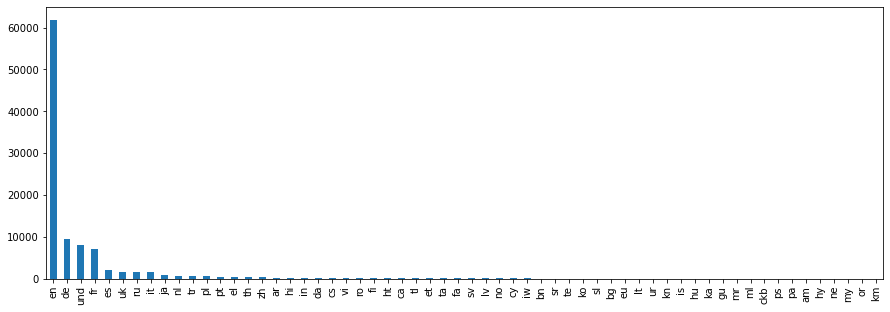

In [17]:
plt.figure(figsize=(15,5))
df['lang'].value_counts().plot.bar()

In [18]:
# analyse des tweets en anglais
df_en = df[df.lang == 'en'].drop('lang', axis=1)

# Localisation des utilisateurs

<AxesSubplot:>

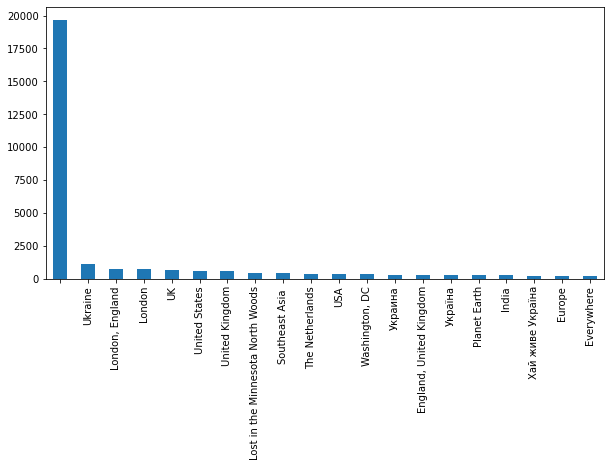

In [19]:
plt.figure(figsize=(10,5))
df_en['location'].value_counts().iloc[:20].plot.bar()

# Analyse des sentiments 

In [20]:
afinn = Afinn()
aff=[]
for sentence in df_en['content']:
    vs=afinn.score(sentence)
    aff.append(vs)
df_en['sentiment']=aff

In [21]:
# creation de la colonne label (positif , neutre ou negatif)
THRESHOLD = 0.2
conditions = [
    (df_en['sentiment'] <= -THRESHOLD), 
    (df_en['sentiment'] > -THRESHOLD) & (df_en['sentiment'] < THRESHOLD),
    (df_en['sentiment'] >= THRESHOLD)
]

values = ["neg","neu", "pos"]
df_en['label'] = np.select(conditions, values)

df_en.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,2013-08-20T13:47:54+00:00,1523,60,26423,11493,4125,5900,Reykjavík,10.0,pos
3,snscrape.modules.twitter.Tweet,https://twitter.com/PILPG/status/1526196345123614720,2022-05-16 13:42:18+00:00,New speakers just announced: Join PILPG's Professor Jennifer Trahan and Ambassador Todd Buchwald this Friday for our expert roundtable on the war in #Ukraine and the role of the #UnitedNations. Learn more and register below. https://t.co/q6uJidSlYK https://t.co/r4t7b7Ix1N,New speakers just announced: Join PILPG's Professor Jennifer Trahan and Ambassador Todd Buchwald this Friday for our expert roundtable on the war in #Ukraine and the role of the #UnitedNations. Learn more and register below. twitter.com/PILPG/status/1… https://t.co/r4t7b7Ix1N,1526196345123614720,"{'_type': 'snscrape.modules.twitter.User', 'username': 'PILPG', 'id': 361360464, 'displayname': 'Public International Law & Policy Group (PILPG)', 'description': 'Public International Law & Policy Group, a global pro bono law firm specializing in peace negotiations, post-conflict constitutions, and transitional justice.', 'rawDescription': 'Public International Law & Policy Group, a global pro bono law firm specializing in peace negotiations, post-conflict constitutions, and transitional justice.', 'descriptionUrls': None, 'verified': True, 'created': '2011-08-24T17:29:56+00:00', 'followersCount': 7917, 'friendsCount': 1135, 'statusesCount': 12521, 'favouritesCount': 2370, 'listedCount': 152, 'mediaCount': 1581, 'location': '', 'protected': False, 'linkUrl': 'http://www.pilpg.org', 'linkTcourl': 'https://t.co/Zxhp9xKlE4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/646143284583206912/AS_zR_zt_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/361360464/1607456964', 'label': None, 'url': 'https://twitter.com/PILPG'}",0,0,0,...,2011-08-24T17:29:56+00:00,1581,152,2370,12521,1135,7917,,-1.0,neg
4,snscrape.modules.twitter.Tweet,https://twitter.com/ToriDi/status/1526196307542560768,2022-05-16 13:42:09+00:00,So #JoeBiden didn’t want #Ukraine to have money wh

<AxesSubplot:xlabel='label', ylabel='Count'>

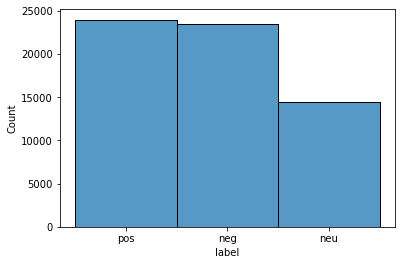

In [22]:
# diagrame en bar des types de sentiments
sns.histplot(df_en["label"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

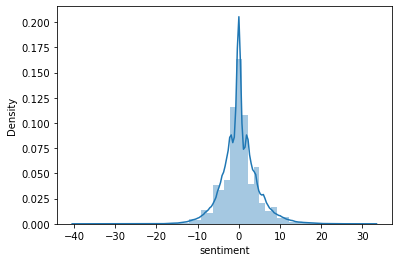

In [23]:
# distribution des sentiments 
sns.distplot(df_en['sentiment'])

# moyenne des sentiment de la population mondial

In [24]:
df_en.sentiment.mean()

0.21889348768026903

In [25]:
df_en.date.min()

Timestamp('2022-05-12 13:45:10+0000', tz='UTC')

In [26]:
df_en.date.max()

Timestamp('2022-05-16 13:42:23+0000', tz='UTC')

# tweet le plus retweeté 

In [27]:
sorted_tweets = df_en.sort_values(by = 'retweetCount', ascending=False)
most_retweeted = sorted_tweets.iloc[0]
phrase=df.content[(df['date']==most_retweeted['date']) & (df['username']==most_retweeted['username'])]
phrase = " ".join(phrase)
print('*'+'-'*30+'Tweet'+'-'*30+'*')
print(phrase)
print('*'+'-'*30+'Details du Tweet'+'-'*30+'*')
print(most_retweeted)

*------------------------------Tweet------------------------------*
“Mr. President, we reached Ukraine’s state border with the enemy state.  Mr. President, we made it!”

Glory to #Ukraine! Glory to Heroes!

#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar

 https://t.co/kdD6kD1w3x
*------------------------------Details du Tweet------------------------------*
_type               snscrape.modules.twitter.Tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# top 10 Tweet Retweeté 

<AxesSubplot:xlabel='username'>

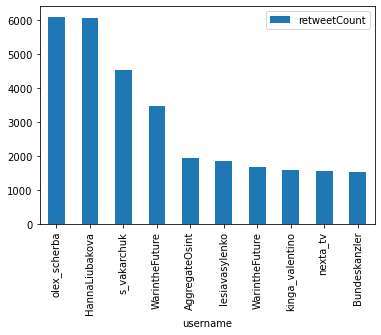

In [28]:
sorted_tweets.head(10).plot.bar(y='retweetCount',x='username')

In [29]:
sorted_tweets.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
11381,snscrape.modules.twitter.Tweet,https://twitter.com/olex_scherba/status/1525967632524091394,2022-05-15 22:33:29+00:00,"“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x","“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x",1525967632524091394,"{'_type': 'snscrape.modules.twitter.User', 'username': 'olex_scherba', 'id': 163018653, 'displayname': 'olexander scherba🇺🇦', 'description': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'rawDescription': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'descriptionUrls': None, 'verified': True, 'created': '2010-07-05T09:44:27+00:00', 'followersCount': 273821, 'friendsCount': 980, 'statusesCount': 28397, 'favouritesCount': 15074, 'listedCount': 3984, 'mediaCount': 4704, 'location': 'Kyiv', 'protected': False, 'linkUrl': 'https://www.amazon.com/Ukraine-vs-Darkness-Undiplomatic-Ukrainian-ebook/dp/B08WKF3B2K', 'linkTcourl': 'https://t.co/ERA9Ntt061', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/671642770549956608/yR9Is6BD_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/163018653/1646220178', 'label': None, 'url': 'https://twitter.com/olex_scherba'}",851,6108,37482,...,2010-07-05T09:44:27+00:00,4704,3984,15074,28397,980,273821,Kyiv,5.0,pos
25808,snscrape.modules.twitter.Tweet,https://twitter.com/HannaLiubakova/status/1525755313412001792,2022-05-15 08:29:48+00:00,"Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD","Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD",1525755313412001792,"{'_type': 'snscrape.modules.twitter.User', 'username': 'HannaLiubakova', 'id': 720139699, 'displayname': 'Hanna Liubakova', 'description': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'rawDescription': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'descriptionUrls': None, 'verified': False, 'created': '2012-07-27T13:16:55+00:00', 'followersCount': 140138, 'friendsCount': 1419, 'statusesCount': 18388, 'favouritesCount': 3658, 'listedCount': 2489, 'mediaCount': 5592, 'location': 'Moving around', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1512025854800502788/A_KNnJw5_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/720139699/1607206467', 'label': None, 'url': 'https://twitter.com/HannaLiubakova'}",258,6057,17448,...,2012-07-27T13:16:55+00:00,5592,2489,3658,18388,1419,140138,Moving around,-4.0,neg
73852,snscrape.modules.twitter.Tweet,https://twitter.com/s_vakarchuk/status/1525165356318433282,2022-05-13 17:25:31+00:00,It is pro

# tweet les plus cités par les utilisateurs (quotecount)

In [30]:
sorted_tweets_quote = df_en.sort_values(by = 'quoteCount', ascending=False)

<AxesSubplot:xlabel='username'>

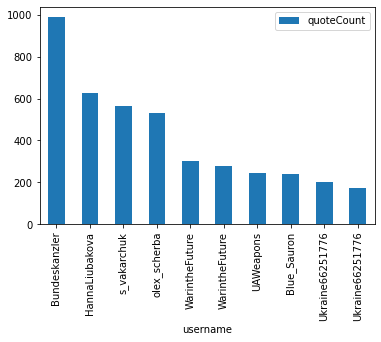

In [31]:
sorted_tweets_quote.head(10).plot.bar(y='quoteCount',x='username')

In [32]:
sorted_tweets_quote.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
80777,snscrape.modules.twitter.Tweet,https://twitter.com/Bundeskanzler/status/1525079306514440194,2022-05-13 11:43:35+00:00,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,1525079306514440194,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Bundeskanzler', 'id': 1489164711652466688, 'displayname': 'Bundeskanzler Olaf Scholz', 'description': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'rawDescription': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'descriptionUrls': None, 'verified': True, 'created': '2022-02-03T09:12:06+00:00', 'followersCount': 465585, 'friendsCount': 93, 'statusesCount': 167, 'favouritesCount': 22, 'listedCount': 1148, 'mediaCount': 38, 'location': '', 'protected': False, 'linkUrl': 'http://www.bundeskanzler.de', 'linkTcourl': 'https://t.co/vXnIPqhhwe', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1494251948782067714/8rYsP-Td_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1489164711652466688/1644759943', 'label': {'_type': 'snscrape.modules.twitter.UserLabel', 'description': 'Regierungsvertreter*in aus Deutschland', 'url': 'https://help.twitter.com/rules-and-policies/state-affiliated', 'badgeUrl': 'https://pbs.twimg.com/semantic_core_img/1290392753013002240/mWq1iE5L?format=png&name=orig', 'longDescription': None}, 'url': 'https://twitter.com/Bundeskanzler'}",5289,1536,8895,...,2022-02-03T09:12:06+00:00,38,1148,22,167,93,465585,,0.0,neu
25808,snscrape.modules.twitter.Tweet,https://twitter.com/HannaLiubakova/status/1525755313412001792,2022-05-15 08:29:48+00:00,"Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD","Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD",1525755313412001792,"{'_type': 'snscrape.modules.twitter.User', 'username': 'HannaLiubakova', 'id': 720139699, 'displayname': 'Hanna Liubakova', 'description': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'rawDescription': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'descriptionUrls': None, 'verified': False, 'created': '2012-07-27T13:16:55+00:00', 'followersCount': 140138, 'friendsCount': 1419, 'statusesCount': 18388, 'favouritesCount': 3658, 'listedCount': 2489, 'mediaCount': 5592, 'location': 'Moving around', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1512025854800502788/A_KNnJw5_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/720139699/1607206467', 'label': None, 'url': 'https://twitter.com/HannaLiubakova'}",258,6

# tweets les plus commentés 

In [33]:
sorted_tweets_reply = df_en.sort_values(by = 'replyCount', ascending=False)

<AxesSubplot:xlabel='username'>

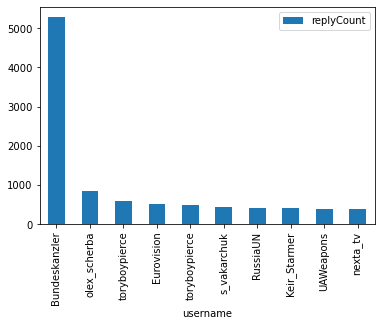

In [34]:
sorted_tweets_reply.head(10).plot.bar(y='replyCount',x='username')

In [35]:
sorted_tweets_reply.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
80777,snscrape.modules.twitter.Tweet,https://twitter.com/Bundeskanzler/status/1525079306514440194,2022-05-13 11:43:35+00:00,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,1525079306514440194,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Bundeskanzler', 'id': 1489164711652466688, 'displayname': 'Bundeskanzler Olaf Scholz', 'description': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'rawDescription': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'descriptionUrls': None, 'verified': True, 'created': '2022-02-03T09:12:06+00:00', 'followersCount': 465585, 'friendsCount': 93, 'statusesCount': 167, 'favouritesCount': 22, 'listedCount': 1148, 'mediaCount': 38, 'location': '', 'protected': False, 'linkUrl': 'http://www.bundeskanzler.de', 'linkTcourl': 'https://t.co/vXnIPqhhwe', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1494251948782067714/8rYsP-Td_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1489164711652466688/1644759943', 'label': {'_type': 'snscrape.modules.twitter.UserLabel', 'description': 'Regierungsvertreter*in aus Deutschland', 'url': 'https://help.twitter.com/rules-and-policies/state-affiliated', 'badgeUrl': 'https://pbs.twimg.com/semantic_core_img/1290392753013002240/mWq1iE5L?format=png&name=orig', 'longDescription': None}, 'url': 'https://twitter.com/Bundeskanzler'}",5289,1536,8895,...,2022-02-03T09:12:06+00:00,38,1148,22,167,93,465585,,0.0,neu
11381,snscrape.modules.twitter.Tweet,https://twitter.com/olex_scherba/status/1525967632524091394,2022-05-15 22:33:29+00:00,"“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x","“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x",1525967632524091394,"{'_type': 'snscrape.modules.twitter.User', 'username': 'olex_scherba', 'id': 163018653, 'displayname': 'olexander scherba🇺🇦', 'description': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'rawDescription': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'descriptionUrls': None, 'verified': True, 'created': '2010-07-05T09:44:27+00:00', 'followersCount': 273821, 'friendsCount': 980, 'statusesCount': 28397, 'favouritesCount': 15074, 'listedCount': 3984, 'mediaCount': 4704, 'location': 'Kyiv', 'protected': False, 'linkUrl': 'https://www.amazon.com/Ukraine-vs-Darkness-Undiplomatic-Ukrainian-ebook/dp/B08WKF3B2K', 'linkTcourl': 'https://t.co/ERA9Ntt061', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/671642770549956608/yR9Is6BD_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/163018653/1646220178', 'label': None, 'url': 'https://twitter.com/olex_scherba'}",851,6108,37482,...,2010-07-05T09:44:27+00:00,4704,3984,15074,28397,980,273821,Kyiv,5.0,pos
45935,s

# compte le plus liké

In [36]:
sorted_tweets_like = df_en.sort_values(by = 'likeCount', ascending=False)

<AxesSubplot:xlabel='username'>

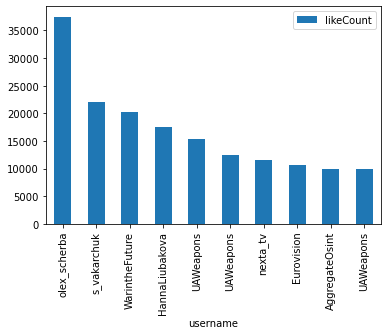

In [37]:
sorted_tweets_like.head(10).plot.bar(y='likeCount',x='username')

In [38]:
sorted_tweets_like.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
11381,snscrape.modules.twitter.Tweet,https://twitter.com/olex_scherba/status/1525967632524091394,2022-05-15 22:33:29+00:00,"“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x","“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x",1525967632524091394,"{'_type': 'snscrape.modules.twitter.User', 'username': 'olex_scherba', 'id': 163018653, 'displayname': 'olexander scherba🇺🇦', 'description': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'rawDescription': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'descriptionUrls': None, 'verified': True, 'created': '2010-07-05T09:44:27+00:00', 'followersCount': 273821, 'friendsCount': 980, 'statusesCount': 28397, 'favouritesCount': 15074, 'listedCount': 3984, 'mediaCount': 4704, 'location': 'Kyiv', 'protected': False, 'linkUrl': 'https://www.amazon.com/Ukraine-vs-Darkness-Undiplomatic-Ukrainian-ebook/dp/B08WKF3B2K', 'linkTcourl': 'https://t.co/ERA9Ntt061', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/671642770549956608/yR9Is6BD_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/163018653/1646220178', 'label': None, 'url': 'https://twitter.com/olex_scherba'}",851,6108,37482,...,2010-07-05T09:44:27+00:00,4704,3984,15074,28397,980,273821,Kyiv,5.0,pos
73852,snscrape.modules.twitter.Tweet,https://twitter.com/s_vakarchuk/status/1525165356318433282,2022-05-13 17:25:31+00:00,It is probably the first in history music performance at Chornobyl power station! \nIncredible workers - brave and dedicated to their job. \nEverything is gonna be alright! #Ukraine 🇺🇦 https://t.co/XLeHPDwrJY,It is probably the first in history music performance at Chornobyl power station! \nIncredible workers - brave and dedicated to their job. \nEverything is gonna be alright! #Ukraine 🇺🇦 https://t.co/XLeHPDwrJY,1525165356318433282,"{'_type': 'snscrape.modules.twitter.User', 'username': 's_vakarchuk', 'id': 81828490, 'displayname': 'Sviatoslav Vakarchuk', 'description': 'musician, social activist 🇺🇦', 'rawDescription': 'musician, social activist 🇺🇦', 'descriptionUrls': None, 'verified': True, 'created': '2009-10-12T12:19:35+00:00', 'followersCount': 1795179, 'friendsCount': 12, 'statusesCount': 5776, 'favouritesCount': 3, 'listedCount': 2466, 'mediaCount': 490, 'location': 'Kyiv, UKRAINE', 'protected': False, 'linkUrl': 'https://www.facebook.com/sviatoslav.vakarchuk/', 'linkTcourl': 'https://t.co/Edt96AGYCR', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1486307855309410306/Pva3Bw_I_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/81828490/1647761724', 'label': None, 'url': 'https://twitter.com/s_vakarchuk'}",438,4547,22044,...,2009-10-12T12:19:35+00:00,490,2466,3,5776,12,1795179,"Kyiv, UKRAINE",4.0,pos
30410,snscrape.modules.twitter.Tweet,https://twitter.com/WarintheFuture/status/1525677618053324802,2022-05-15 03:21:04+00:00,"The battle of Kharkiv has been won by #Ukraine, with Russian forces withdrawing to the north &amp; east. Today, analysis on what is next for Ukraine’s military as it exploits a faltering Russian eastern offensive. 1/25 https://t.co/CRX3jDhBhA","The battle of Kharkiv has been won by #Ukraine, with Russian forces withdrawing to the north &amp; east. Today, analysis on what is next for Ukraine’s military as 

# compte le plus suivi

In [39]:
sorted_tweets_followers = df_en.sort_values(by = 'followersCount', ascending=False)

<AxesSubplot:xlabel='username'>

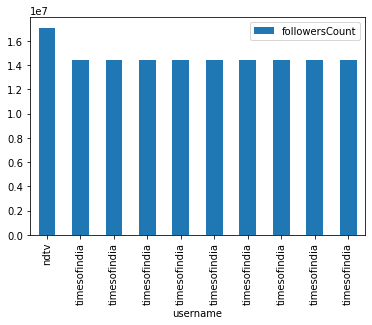

In [40]:
sorted_tweets_followers.head(10).plot.bar(y='followersCount',x='username')

In [41]:
sorted_tweets_followers

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
9183,snscrape.modules.twitter.Tweet,https://twitter.com/ndtv/status/1526042375256170497,2022-05-16 03:30:29+00:00,#Ukraine's Kalush Orchestra wins #Eurovision2022 song contest https://t.co/obCU79Bwpi,#Ukraine's Kalush Orchestra wins #Eurovision2022 song contest https://t.co/obCU79Bwpi,1526042375256170497,"{'_type': 'snscrape.modules.twitter.User', 'username': 'ndtv', 'id': 37034483, 'displayname': 'NDTV', 'description': 'Breaking news alerts from India. Instagram: instagram.com/ndtv YouTube: youtube.com/ndtv', 'rawDescription': 'Breaking news alerts from India. Instagram: https://t.co/QrV2OUzOYo YouTube: https://t.co/INzHBLFd1l', 'descriptionUrls': [{'text': 'instagram.com/ndtv', 'url': 'http://instagram.com/ndtv', 'tcourl': 'https://t.co/QrV2OUzOYo', 'indices': [45, 68]}, {'text': 'youtube.com/ndtv', 'url': 'http://youtube.com/ndtv', 'tcourl': 'https://t.co/INzHBLFd1l', 'indices': [78, 101]}], 'verified': True, 'created': '2009-05-01T20:34:48+00:00', 'followersCount': 17077048, 'friendsCount': 14, 'statusesCount': 940154, 'favouritesCount': 0, 'listedCount': 14181, 'mediaCount': 472302, 'location': 'India', 'protected': False, 'linkUrl': 'http://www.ndtv.com/', 'linkTcourl': 'https://t.co/KFTuQYp7En', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/570440108424171520/QuGYd7jH_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/37034483/1636163355', 'label': None, 'url': 'https://twitter.com/ndtv'}",2,2,23,...,2009-05-01T20:34:48+00:00,472302,14181,0,940154,14,17077048,India,4.0,pos
87715,snscrape.modules.twitter.Tweet,https://twitter.com/timesofindia/status/1524957557064081409,2022-05-13 03:39:48+00:00,"#Ukraine says it damaged Russian ship, seeks evacuation of wounded #Mariupol fighters \n\nRead: https://t.co/9zZHmscXcb\n\n#UkraineRussiaWar https://t.co/EYJJVDCo9X","#Ukraine says it damaged Russian ship, seeks evacuation of wounded #Mariupol fighters \n\nRead: toi.in/YQ6ZWY/a24gk\n\n#UkraineRussiaWar https://t.co/EYJJVDCo9X",1524957557064081409,"{'_type': 'snscrape.modules.twitter.User', 'username': 'timesofindia', 'id': 134758540, 'displayname': 'The Times Of India', 'description': 'News. Views. Analysis. Conversations. India’s No.1 digital news destination, world’s largest-selling English newspaper - A Times Internet Limited Product', 'rawDescription': 'News. Views. Analysis. Conversations. India’s No.1 digital news destination, world’s largest-selling English newspaper - A Times Internet Limited Product', 'descriptionUrls': None, 'verified': True, 'created': '2010-04-19T10:50:15+00:00', 'followersCount': 14418984, 'friendsCount': 459, 'statusesCount': 767726, 'favouritesCount': 6, 'listedCount': 12675, 'mediaCount': 357912, 'location': 'New Delhi', 'protected': False, 'linkUrl': 'http://www.timesofindia.com', 'linkTcourl': 'https://t.co/0b6wnY5Vqp', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1129666669054324736/1W_E72cn_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/134758540/1651805709', 'label': None, 'url': 'https://twitter.com/timesofindia'}",1,4,16,...,2010-04-19T10:50:15+00:00,357912,12675,6,767726,459,14418984,New Delhi,-4.0,neg
87972,snscrape.modules.twitter.Tweet,https://twitter.com/timesofindia/status/1524947622938947584,2022-05-13 03:00:20+00:00,India among 12 to abstain from #UNHRC #Ukraine vote \n\nRead: https://t.co/DQmXbKt2XB https://t.co/ZAAgXqTgeL,India among 12 to abstain from #UNHRC #Ukraine vote \n\nRead: toi.in/18U23Z/a24gk https://t.co/ZAAgXqTgeL,1524947622938947584,"{'_type': 'snscrape.modules.twitter.User', 'username': 'timesofindia', 'id': 134758540, 'displayname': 'The Times Of India', 'description': 'News. Views. Analysis. Conversations. India’s No.1 digital news destination, world’s largest-selling English newspaper - A Times Inter

# compte qui a le plus d'amis

In [42]:
sorted_tweets_friends = df_en.sort_values(by = 'friendsCount', ascending=False)

<AxesSubplot:xlabel='username'>

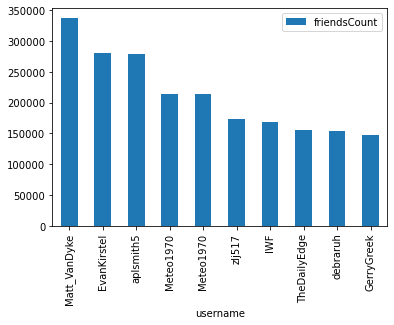

In [43]:
sorted_tweets_friends.head(10).plot.bar(y='friendsCount',x='username')

In [44]:
sorted_tweets_friends.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
93391,snscrape.modules.twitter.Tweet,https://twitter.com/Matt_VanDyke/status/1524834387522637830,2022-05-12 19:30:22+00:00,My recent appearance on @TheWO17 #Report on @Coalition_Radio with @irinatsukerman_.\n\nWe discussed how my 501c3 non-profit organization Sons of Liberty International (@OfficialSOLI) is training forces in #Ukraine to fight #Russia.\n\n#StandWithUkraine \n\nhttps://t.co/bZPvpv9wiL,My recent appearance on @TheWO17 #Report on @Coalition_Radio with @irinatsukerman_.\n\nWe discussed how my 501c3 non-profit organization Sons of Liberty International (@OfficialSOLI) is training forces in #Ukraine to fight #Russia.\n\n#StandWithUkraine \n\nyoutu.be/9SzxKij3Nn0,1524834387522637830,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Matt_VanDyke', 'id': 431071870, 'displayname': 'Matthew VanDyke', 'description': 'Founder, Sons of Liberty International, #veterans training forces to fight against terrorists and dictators. 501c3 nonprofit org. SonsOfLibertyInternational.com', 'rawDescription': 'Founder, Sons of Liberty International, #veterans training forces to fight against terrorists and dictators. 501c3 nonprofit org. https://t.co/iJVW8PgiN9', 'descriptionUrls': [{'text': 'SonsOfLibertyInternational.com', 'url': 'http://SonsOfLibertyInternational.com', 'tcourl': 'https://t.co/iJVW8PgiN9', 'indices': [130, 153]}], 'verified': True, 'created': '2011-12-07T21:56:51+00:00', 'followersCount': 440685, 'friendsCount': 336610, 'statusesCount': 5041, 'favouritesCount': 6957, 'listedCount': 1569, 'mediaCount': 527, 'location': 'Ukraine', 'protected': False, 'linkUrl': 'http://www.matthewvandyke.com', 'linkTcourl': 'https://t.co/nYbedJ5JEH', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/571618282881298432/qZCHume4_normal.jpeg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/431071870/1435933591', 'label': None, 'url': 'https://twitter.com/Matt_VanDyke'}",5,18,77,...,2011-12-07T21:56:51+00:00,527,1569,6957,5041,336610,440685,Ukraine,1.0,pos
60055,snscrape.modules.twitter.Tweet,https://twitter.com/EvanKirstel/status/1525462902114746372,2022-05-14 13:07:52+00:00,"Putin's Stalinist deportation plan for 2MILLION Ukrainians: chilling official blueprint for mass expulsion and 1,310 'transit centres' - drawn up before invasion began #russia #ukraine 😡 https://t.co/VtopkrtGc5","Putin's Stalinist deportation plan for 2MILLION Ukrainians: chilling official blueprint for mass expulsion and 1,310 'transit centres' - drawn up before invasion began #russia #ukraine 😡 mol.im/a/10814841",1525462902114746372,"{'_type': 'snscrape.modules.twitter.User', 'username': 'EvanKirstel', 'id': 35203319, 'displayname': '🇺🇦Evan Kirstel #TechFluencer', 'description': 'Tech influencer, content creator & Industry Insider w/ 500K+ Social Media followers focused on Enterprise 💻 Cloud ☁️5G 📡AI 🤖Telecom ☎️ Voice 🗣 CX & beyond.', 'rawDescription': 'Tech influencer, content creator & Industry Insider w/ 500K+ Social Media followers focused on Enterprise 💻 Cloud ☁️5G 📡AI 🤖Telecom ☎️ Voice 🗣 CX & beyond.', 'descriptionUrls': None, 'verified': False, 'created': '2009-04-25T12:45:16+00:00', 'followersCount': 324654, 'friendsCount': 280357, 'statusesCount': 1085671, 'favouritesCount': 590560, 'listedCount': 13089, 'mediaCount': 299397, 'location': 'Boston, MA', 'protected': False, 'linkUrl': 'https://linktr.ee/EvanKirstel', 'linkTcourl': 'https://t.co/JL6As8H9XS', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1483222456563384321/wYCiARLh_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/35203319/1649362490', 'label': None, 'url': 'https://twitter.com/EvanKirstel'}",0,3,3,...,2009-04-25T12:45:16+00:00,299397,13089,590560,1085671,280357,324654,"Boston, MA",-4.0,neg
7565,snscrape.modules.twitter.Tweet,https://twitte

# utilisateur qui à liké le plus grand nombre de tweet 

In [45]:
sorted_tweets_favourites = df_en.sort_values(by = 'favouritesCount', ascending=False)

<AxesSubplot:xlabel='username'>

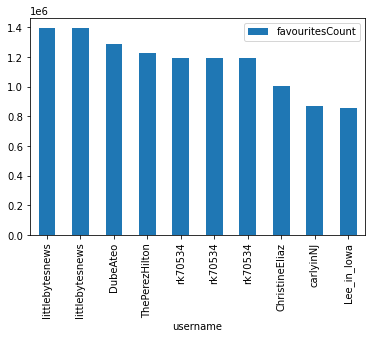

In [46]:
sorted_tweets_favourites.head(10).plot.bar(y='favouritesCount',x='username')

In [47]:
sorted_tweets_favourites.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
24960,snscrape.modules.twitter.Tweet,https://twitter.com/littlebytesnews/status/1525764743155392513,2022-05-15 09:07:16+00:00,"RT:\n\nKalush Orchestra released a post-Eurovision video for their winning song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka which were destroyed by the Russians: #Ukraine https://t.co/APD6AEWFkg\n\n— KT ""Special Intelligence Operation"" (@KremlinTrolls) May 15, 2022","RT:\n\nKalush Orchestra released a post-Eurovision video for their winning song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka which were destroyed by the Russians: #Ukraine bit.ly/3LdLIX9\n\n— KT ""Special Intelligence Operation"" (@KremlinTrolls) May 15, 2022",1525764743155392513,"{'_type': 'snscrape.modules.twitter.User', 'username': 'littlebytesnews', 'id': 12896172, 'displayname': 'Patty 🌻🇺🇸🌵', 'description': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe bit.ly/2zSmoTw', 'rawDescription': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe https://t.co/pNW32dq3V0', 'descriptionUrls': [{'text': 'bit.ly/2zSmoTw', 'url': 'http://bit.ly/2zSmoTw', 'tcourl': 'https://t.co/pNW32dq3V0', 'indices': [131, 154]}], 'verified': False, 'created': '2008-01-31T01:53:37+00:00', 'followersCount': 20680, 'friendsCount': 13460, 'statusesCount': 1274340, 'favouritesCount': 1395074, 'listedCount': 1002, 'mediaCount': 33253, 'location': 'USA', 'protected': False, 'linkUrl': 'https://www.littlebytesnews.com', 'linkTcourl': 'https://t.co/Rstb5ezele', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/872237122710757376/PS5Jn919_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/12896172/1502001700', 'label': None, 'url': 'https://twitter.com/littlebytesnews'}",0,0,0,...,2008-01-31T01:53:37+00:00,33253,1002,1395074,1274340,13460,20680,USA,1.0,pos
85600,snscrape.modules.twitter.Tweet,https://twitter.com/littlebytesnews/status/1525006148675543041,2022-05-13 06:52:53+00:00,"RT:\n\n#Ukraine - 'No time to hide' for Ukraine social worker in town near front line. 📸 @dilkoff #AFP https://t.co/mNenRUentg\n\n— AFP Photo (@AFPphoto) May 13, 2022","RT:\n\n#Ukraine - 'No time to hide' for Ukraine social worker in town near front line. 📸 @dilkoff #AFP bit.ly/3w9trWN\n\n— AFP Photo (@AFPphoto) May 13, 2022",1525006148675543041,"{'_type': 'snscrape.modules.twitter.User', 'username': 'littlebytesnews', 'id': 12896172, 'displayname': 'Patty 🌻🇺🇸🌵', 'description': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe bit.ly/2zSmoTw', 'rawDescription': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe https://t.co/pNW32dq3V0', 'descriptionUrls': [{'text': 'bit.ly/2zSmoTw', 'url': 'http://bit.ly/2zSmoTw', 'tcourl': 'https://t.co/pNW32dq3V0', 'indices': [131, 154]}], 'verified': False, 'created': '2008-01-31T01:53:37+00:00', 'followersCount': 20680, 'friendsCount': 13460, 'statusesCount': 1274341, 'favouritesCount': 1395074, 'listedCount': 1002, 'mediaCount': 33253, 'location': 'USA', 'protected': False, 'linkUrl': 'https://www.littlebytesnews.com', 'linkTcourl': 'https://t.co/Rstb5ezele', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/872237122710757376/PS5Jn919_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/12896172/1502001700', 'label': None, 'url': 'https://twitter.com/littlebytesnews'}",0,0,0,...,2008-01-31T01:53:37+00:00,33253,1002,1395074,1274341,13460,20680,USA,-2.0,neg
41732,snscrape.modules.twitter.Tweet,https://twitter.com/DubeAteo/status/1525612963779993608,2022-05-14 23:

# utilisateurs possedant le plus grand nombre de tweets

<AxesSubplot:>

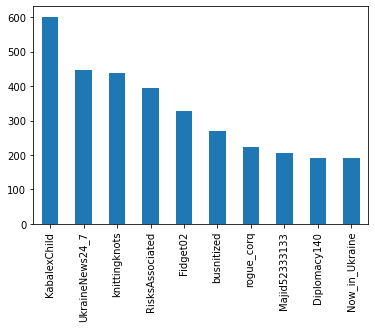

In [48]:
df_en.username.value_counts().head(10).plot.bar(x='username')

In [49]:
df_en.username.value_counts().head(10)

KabalexChild       601
UkraineNews24_7    446
knittingknots      438
RisksAssociated    394
Fidget02           328
busnitized         269
rogue_corq         223
Majid52333133      205
Diplomacy140       192
Now_in_Ukraine     191
Name: username, dtype: int64

moyenne de chacun de ces utilisateurs

In [50]:
df_en[df_en.username=='KabalexChild'].sentiment.mean()       

-2.815307820299501

In [51]:
df_en[df_en.username=='UkraineNews24_7'].sentiment.mean()       

-0.9663677130044843

# preparation des données pour le wordcloud

In [52]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_en["content"] = df_en["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# wordcloud de tous les tweets

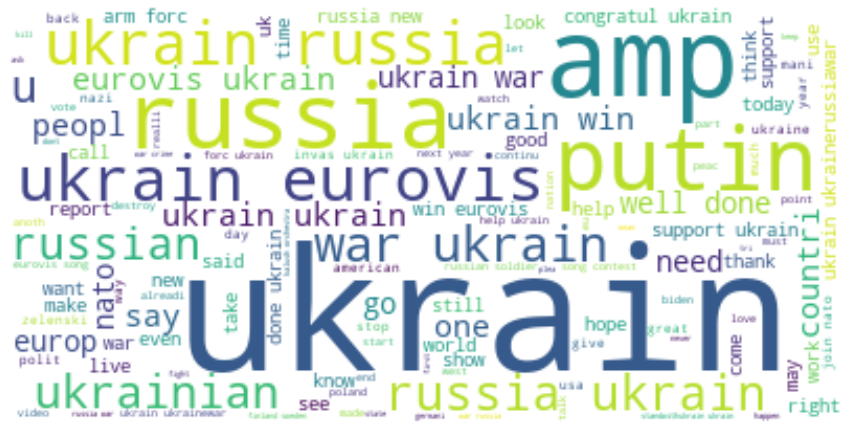

In [53]:
text = " ".join(i for i in df_en.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets negatif

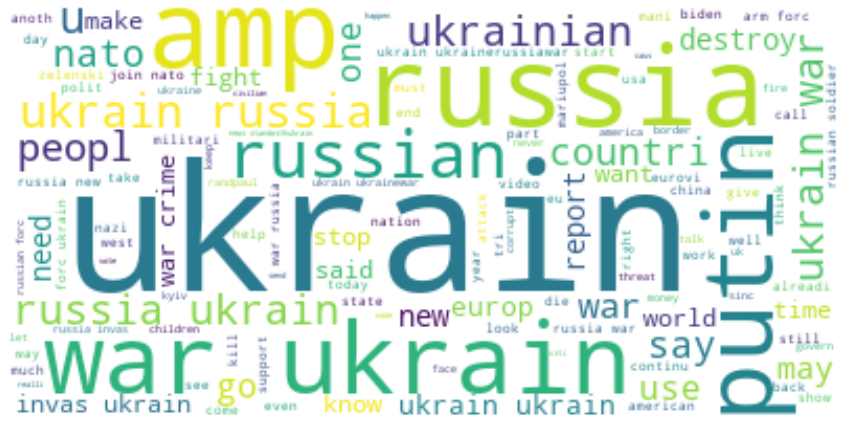

In [54]:
negative =' '.join([i for i in df_en['content'][df_en['sentiment'] < 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets positifs

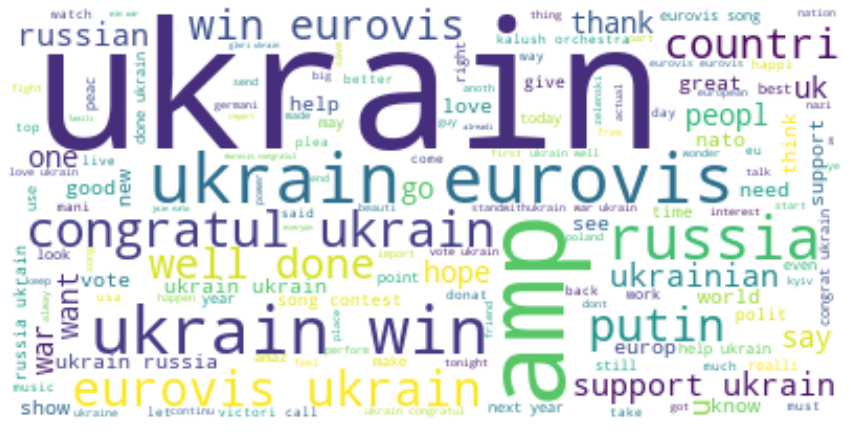

In [55]:
positif =' '.join([i for i in df_en['content'][df_en['sentiment'] > 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positif)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets neutres

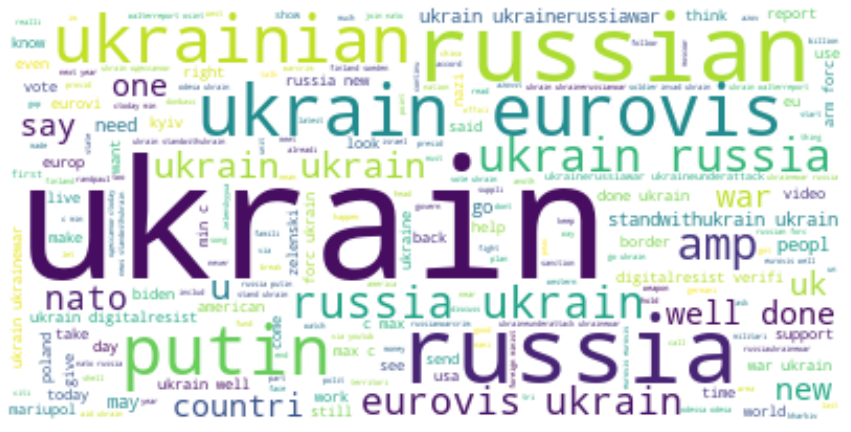

In [56]:
neutre =' '.join([i for i in df_en['content'][df_en['sentiment'] == 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neutre)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyse Hashtags

In [57]:
hashtags = [item for l in df['hashtags'].dropna() for item in l]
hashtags

hashtags_Positifs=[item for l in df_en['hashtags'][df_en['sentiment']>0].dropna() for item in l]
hashtags_Negatifs=[item for l in df_en['hashtags'][df_en['sentiment']<0].dropna() for item in l]

In [58]:
topXItem = 10
from collections import Counter

x_hashtags = Counter(hashtags)
x_hashtags_Positifs = Counter(hashtags_Positifs)
x_hashtags_Negatifs = Counter(hashtags_Negatifs)

topXItemList_hashtags = x_hashtags.most_common(topXItem)
topXItemList_hashtags_Positifs = x_hashtags_Positifs.most_common(topXItem)
topXItemList_hashtags_Negatifs = x_hashtags_Negatifs.most_common(topXItem)

<AxesSubplot:xlabel='Hashtag'>

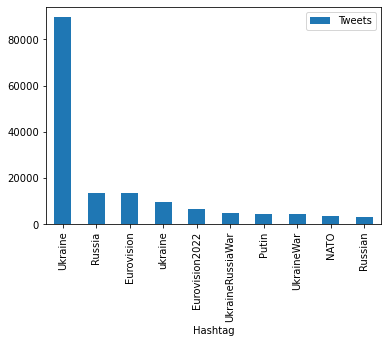

In [59]:
df_hash = pd.DataFrame(topXItemList_hashtags)
df_hash.columns =['Hashtag','Tweets']
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag positifs

<AxesSubplot:xlabel='Hashtag'>

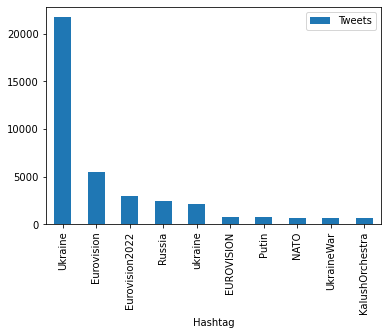

In [60]:
df_hash_positif = pd.DataFrame(topXItemList_hashtags_Positifs)
df_hash_positif.columns =['Hashtag','Tweets']
df_hash_positif.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag negatifs

<AxesSubplot:xlabel='Hashtag'>

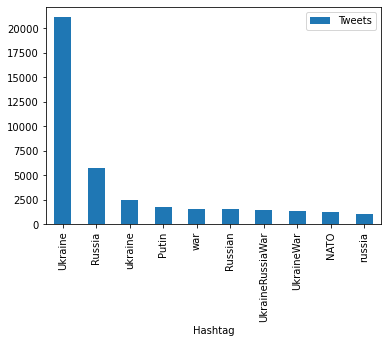

In [61]:
df_hash_negatifs = pd.DataFrame(topXItemList_hashtags_Negatifs)
df_hash_negatifs.columns =['Hashtag','Tweets']
df_hash_negatifs.plot.bar(x='Hashtag', y='Tweets', rot=90)


In [62]:
# # definition des x et y 
# dates = df_count_tweet['Date']
# y = df_count_tweet['tweet_count']

# Analyse des tweets en russe

In [63]:
df_ru = df[df.lang == 'ru'].drop('lang', axis=1)

In [64]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
tokens = tokenizer.split('всё очень плохо')  # [('всё', None), ('очень', None), ('плохо', None)]

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = df_ru.content

results = model.predict(messages, k=1)


In [65]:
label=[]
sentiment=[]
for i in range(len(results)):
    label.append(list(results[i].keys())[0])
    sentiment.append((list(results[i].values())[0]))

df_ru["label"]=label
df_ru["sentiment"]=sentiment


<AxesSubplot:xlabel='label', ylabel='Count'>

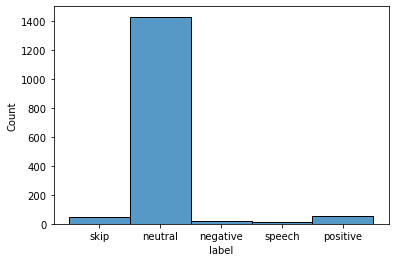

In [66]:
sns.histplot(df_ru["label"])

# tweet le plus retweeté 

In [67]:
sorted_tweets_ru = df_ru.sort_values(by = 'retweetCount', ascending=False)
most_retweeted = sorted_tweets_ru.iloc[0]
phrase=df.content[(df['date']==most_retweeted['date']) & (df['username']==most_retweeted['username'])]
phrase = " ".join(phrase)
print('*'+'-'*30+'Tweet'+'-'*30+'*')
print(phrase)
print('*'+'-'*30+'Details du Tweet'+'-'*30+'*')
print(most_retweeted)

*------------------------------Tweet------------------------------*
В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.
#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC
*------------------------------Details du Tweet------------------------------*
_type               snscrape.modules.twitter.Tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

<AxesSubplot:xlabel='username'>

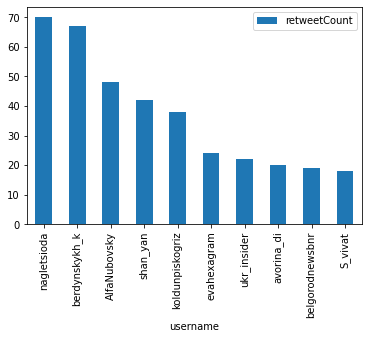

In [68]:
sorted_tweets_ru.head(10).plot.bar(y='retweetCount',x='username')

In [69]:
sorted_tweets_ru.head(10).description

6238     Kuklavod                                                                                                                        
49509    journalist NV.ua                                                                                                                
82965                                                                                                                                    
81621    Co-founder Ukrainian Institute for the Future. О хаосе весело и с огоньком.                                                     
40864    don't send nudes\nSEND HELP                                                                                                     
82690    עברנו את פרעה, נעבור גם את זה                                                                                                   
48569    Актуальные новости. Оперативная информация. Все подробности войны.                                                              
32786    Роздуми про кіно та життя

# tweet les plus cités par les utilisateurs (quotecount)

In [70]:
sorted_tweets_quote_ru = df_ru.sort_values(by = 'quoteCount', ascending=False)

<AxesSubplot:xlabel='username'>

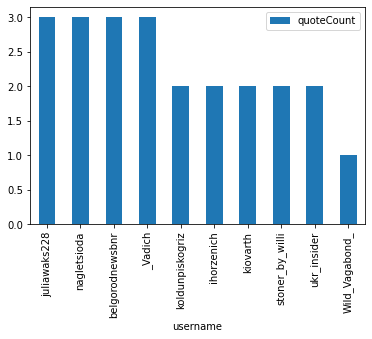

In [71]:
sorted_tweets_quote_ru.head(10).plot.bar(y='quoteCount',x='username')

In [72]:
sorted_tweets_quote_ru.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,label,sentiment
38911,snscrape.modules.twitter.Tweet,https://twitter.com/juliawaks228/status/1525614043884662786,2022-05-14 23:08:27+00:00,Как будет проходить Евровидение в следующем году\n\n#Ukraine\n#Eurovision2022\n#Eurovision https://t.co/5QZFxjLjXa,Как будет проходить Евровидение в следующем году\n\n#Ukraine\n#Eurovision2022\n#Eurovision https://t.co/5QZFxjLjXa,1525614043884662786,"{'_type': 'snscrape.modules.twitter.User', 'username': 'juliawaks228', 'id': 742693403100602368, 'displayname': '🆕ъᴇбūᴛᴇльнø Пр∆в∆| 🕊️ #нетвойне', 'description': '19у.о✨не k-попер✨делаю оформы ✨человек-дерьмо✨LGBT+🍂социопат✨aгностик✨вегетарианец✨люблю пиво 🍺', 'rawDescription': '19у.о✨не k-попер✨делаю оформы ✨человек-дерьмо✨LGBT+🍂социопат✨aгностик✨вегетарианец✨люблю пиво 🍺', 'descriptionUrls': None, 'verified': False, 'created': '2016-06-14T12:21:20+00:00', 'followersCount': 14894, 'friendsCount': 9724, 'statusesCount': 18686, 'favouritesCount': 11466, 'listedCount': 60, 'mediaCount': 3552, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1500597134831276035/mOa1Tf2K_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/742693403100602368/1646605212', 'label': None, 'url': 'https://twitter.com/juliawaks228'}",4,0,8,...,2016-06-14T12:21:20+00:00,3552,60,11466,18686,9724,14894,,neutral,0.919653
6238,snscrape.modules.twitter.Tweet,https://twitter.com/nagletsioda/status/1526110694478848001,2022-05-16 08:01:57+00:00,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,1526110694478848001,"{'_type': 'snscrape.modules.twitter.User', 'username': 'nagletsioda', 'id': 1314396097905909767, 'displayname': 'Vlad', 'description': 'Kuklavod', 'rawDescription': 'Kuklavod', 'descriptionUrls': None, 'verified': False, 'created': '2020-10-09T02:43:58+00:00', 'followersCount': 59, 'friendsCount': 27, 'statusesCount': 94, 'favouritesCount': 67, 'listedCount': 1, 'mediaCount': 30, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1314399916266004480/IOuaO68x_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1314396097905909767/1602212470', 'label': None, 'url': 'https://twitter.com/nagletsioda'}",12,70,80,...,2020-10-09T02:43:58+00:00,30,1,67,94,27,59,,neutral,0.672342
35492,snscrape.modules.twitter.Tweet,https://twitter.com/belgorodnewsbnr/status/1525617425034665984,2022-05-14 23:21:53+00:00,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,1525617425034665984,"{'_type': 'snscrape.modules.twitter.User', 'username': 'belgorodnewsbnr', 'id': 1142863047314280450, 'displayname': 'Белгород новости (БНР News)', 'description': 'Новости Белгорода. Белгород новости. Belgorod news. БНР. Белгород онлайн. #Белгород #Belgorod #news #now #today #Белгородсегодня', 'rawDescription': '

# tweets les plus commentés 

In [73]:
sorted_tweets_reply_ru = df_ru.sort_values(by = 'replyCount', ascending=False)

<AxesSubplot:xlabel='username'>

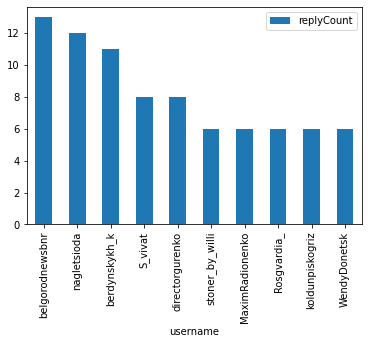

In [74]:
sorted_tweets_reply_ru.head(10).plot.bar(y='replyCount',x='username')

In [75]:
sorted_tweets_reply_ru.head(10).description

35492    Новости Белгорода. Белгород новости. Belgorod news. БНР. Белгород онлайн. #Белгород #Belgorod #news #now #today #Белгородсегодня                                 
6238     Kuklavod                                                                                                                                                         
49509    journalist NV.ua                                                                                                                                                 
16547    Жыве Беларусь! Жыве Вечна!\nŽyve Belarus! Žyve Večna!                                                                                                            
36654    Filmmaker, cameraman and screenwriter. Independent and experimental cinema, I share all of this here whenever possible. E-mail:directorgurenko@gmail.com         
22098    23 года, девушка, рф, москва. неприкаянная оппозиционерка в своей стране. лгбт-френдли. феминистка умеренного толка. бисексуальна. студе

# compte le plus liké

In [76]:
sorted_tweets_like_ru = df_ru.sort_values(by = 'likeCount', ascending=False)

<AxesSubplot:xlabel='username'>

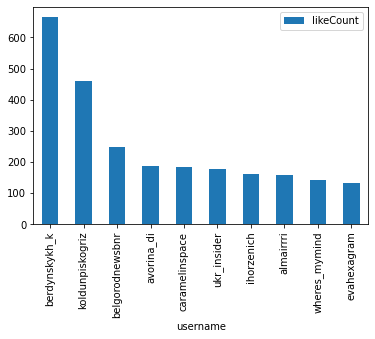

In [77]:
sorted_tweets_like_ru.head(10).plot.bar(y='likeCount',x='username')

In [78]:
sorted_tweets_like_ru.head(10).location

49509    Kyiv            
40864                    
35492    Белгород        
32786                    
38180    Poland          
48569    Украина         
49914    Kharkiv, Ukraine
41474                    
34670                    
82690    Украина         
Name: location, dtype: object

# utilisateur avec le plus grand nombre de tweets

<AxesSubplot:>

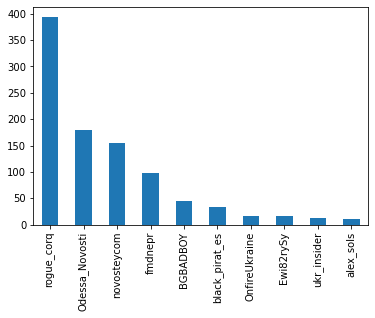

In [79]:
df_ru.username.value_counts().head(10).plot.bar(x='username')

In [80]:
df_ru.username.value_counts().head(10)

rogue_corq        393
Odessa_Novosti    180
novosteycom       155
fmdnepr           97 
BGBADBOY          44 
black_pirat_es    33 
OnfireUkraine     17 
Ewi82rySy         16 
ukr_insider       13 
alex_sols         10 
Name: username, dtype: int64

In [81]:
df_ru[df_ru.username=='ukr_insider'].location       

40127    Украина
40853    Украина
43455    Украина
46606    Украина
46916    Украина
47332    Украина
47519    Украина
47948    Украина
48208    Украина
48569    Украина
48681    Украина
53198    Украина
95464    Украина
Name: location, dtype: object

# wordcloud des tweets russes

In [82]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
nltk.download('stopwords')
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in russian_stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_ru["content"] = df_ru["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


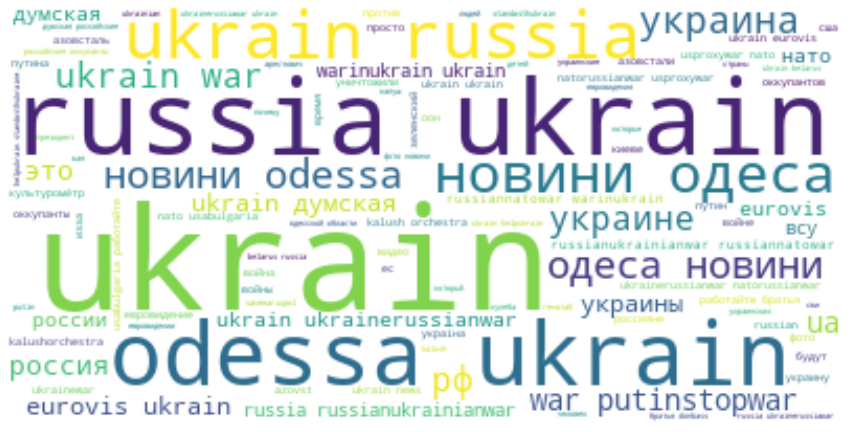

In [83]:
text = " ".join(i for i in df_ru.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=russian_stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# scrapper les tweet de Biden, poutin, zelensky

In [84]:
queryJB ="(from:POTUS) since:2022-02-01"
queryVP ="(from:KremlinRussia_E) since:2022-02-01"
queryEM ="(from:EmmanuelMacron) since:2022-02-01"
queryVZ ="(from:ZelenskyyUa) since:2022-02-01"
query=[queryJB,queryVP,queryEM,queryVZ]

df_POTUS=[]
df_KremlinRussia_E=[]
df_EmmanuelMacron=[]
df_ZelenskyyUa=[]
presidents=[df_POTUS,df_KremlinRussia_E,df_EmmanuelMacron,df_ZelenskyyUa]

limits =2000
president=0

for query in query:
    tweets = []
    for tweet in scpt.TwitterSearchScraper(query).get_items():

        if len(tweets)==limits :
            break
        else :
            tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
                        tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
                        tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
        
    presidents[president] = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
                                            'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
    president=president+1

df_POTUS=presidents[0]
df_KremlinRussia_E=presidents[1]
df_EmmanuelMacron=presidents[2]
df_ZelenskyyUa= presidents[3]

# Evolution du nombre de tweets/jour des presidents

In [85]:
# dateTime to date 
for df in presidents:
    df['Date'] = pd.to_datetime(df['Date']).dt.date

In [86]:
df_count_tweet_POTUS=0
df_count_tweet_KremlinRussia_E=0
df_count_tweet_EmmanuelMacron=0
df_count_tweet_ZelenskyyUa=0
df_count_tweets=[df_count_tweet_POTUS,df_count_tweet_KremlinRussia_E,df_count_tweet_EmmanuelMacron,df_count_tweet_ZelenskyyUa]
i=0
for df_count_tweet in df_count_tweets:
    df_count_tweets[i] = (presidents[i]
          .value_counts('Date',sort = False)
          .rename_axis('Date')
          .reset_index(name='tweet_count'))
    i+=1

df_count_tweet_POTUS=df_count_tweets[0]
df_count_tweet_KremlinRussia_E=df_count_tweets[1]
df_count_tweet_EmmanuelMacron=df_count_tweets[2]
df_count_tweet_ZelenskyyUa=df_count_tweets[3]

# nombre de tweets/jour

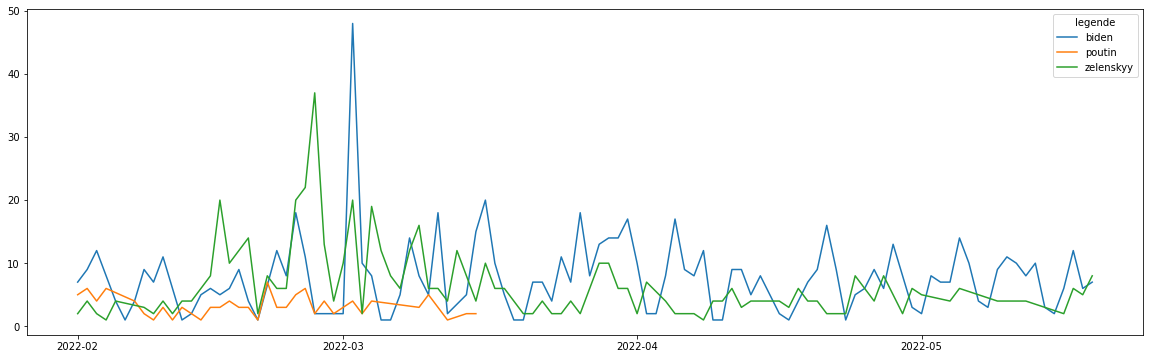

In [87]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]
df_count_tweets=[df_count_tweet_POTUS,df_count_tweet_KremlinRussia_E,df_count_tweet_ZelenskyyUa]


i=0
fig, ax = plt.subplots(figsize=(20, 6))
for df in presidents:
    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df_count_tweets[i]['Date'], df_count_tweets[i]['tweet_count'])
    legend = plt.legend(nom_presidents, title = 'legende')
    i+=1

# Analyse des sentiments des présisdents 

In [88]:
afinn = Afinn()

for df in presidents:
    aff=[]
    for sentence in df['content']:
        vs=afinn.score(sentence)
        aff.append(vs)
    df['sentiment']=aff

In [89]:
# creation de la colonne label (positif , neutre ou negatif)
THRESHOLD = 0.2
for df in presidents:
    conditions = [
        (df['sentiment'] <= -THRESHOLD), 
        (df['sentiment'] > -THRESHOLD) & (df['sentiment'] < THRESHOLD),
        (df['sentiment'] >= THRESHOLD)
    ]

    values = ["neg","neu", "pos"]
    df['label'] = np.select(conditions, values)

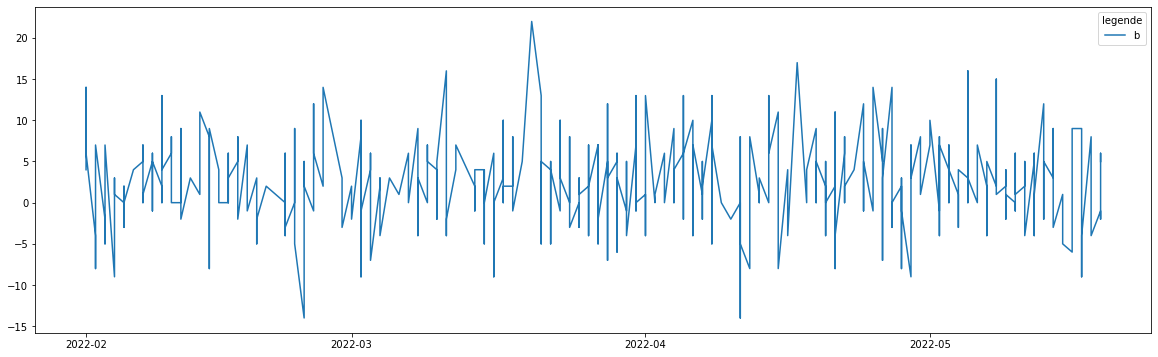

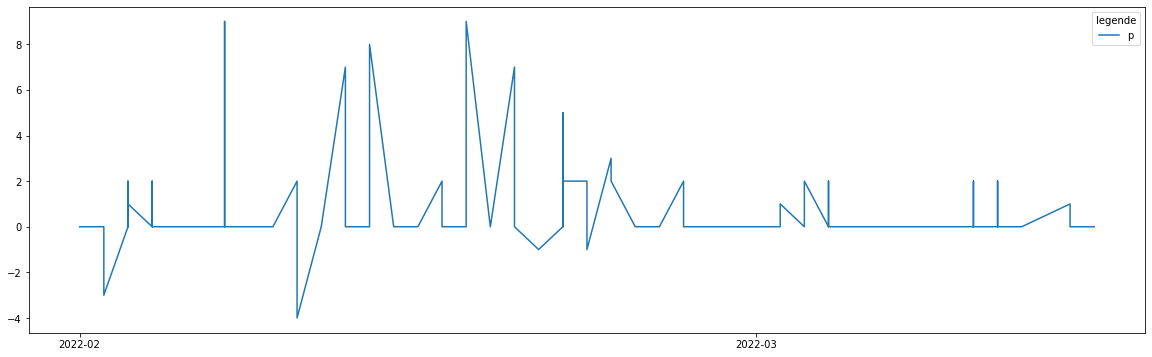

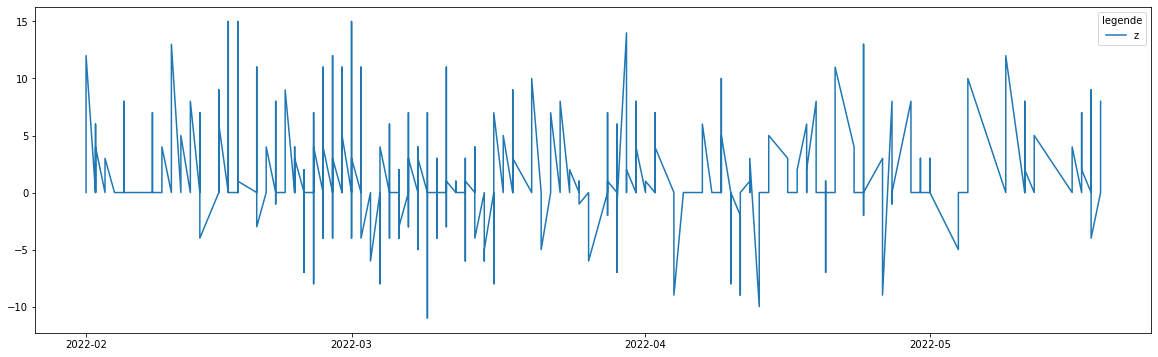

In [90]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]

i=0
for df in presidents:
    fig, ax = plt.subplots(figsize=(20, 6))

    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df['Date'], df['sentiment'])
    legend = plt.legend(nom_presidents[i], title = 'legende')
    i+=1

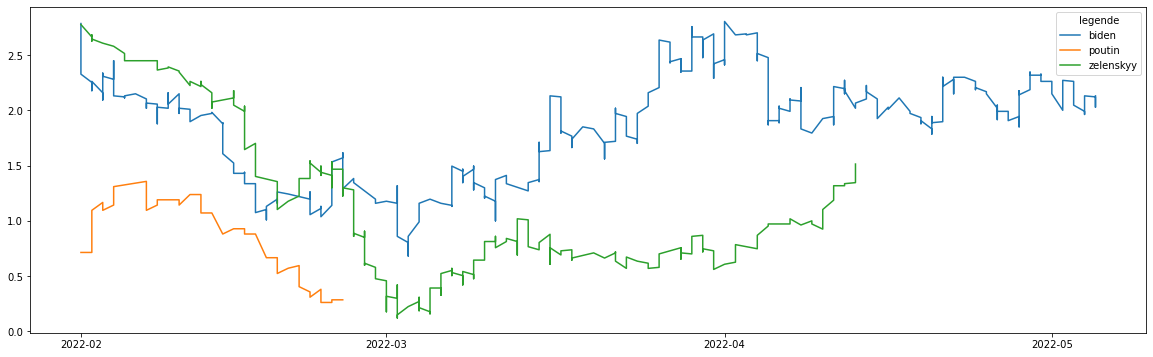

In [91]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]
fig, ax = plt.subplots(figsize=(20, 6))

for df in presidents:

    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df['Date'], df['sentiment'].rolling((df['Date'].max() - df['Date'].min()).days).mean())
    legend = plt.legend(nom_presidents, title = 'legende')


# tweet pendants les periodes fortes et faibles

In [92]:
df_POTUS.sort_values(by = 'sentiment', ascending=True)
# df_KremlinRussia_E.sort_values(by = 'sentiment', ascending=True)
# df_ZelenskyyUa.sort_values(by = 'sentiment', ascending=True)

,Date,Username,displayname,UserDescription,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,content,replyCount,retweetCount,likeCount,quoteCount,lang,hashtags,sentiment,label
267,2022-04-11,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372700,12,3203,0,18025,1028,,"In addition to today’s rule, we’re working in four areas to reduce gun violence:\n \n- Going after rogue gun dealers\n- Disrupting illegal gun trafficking\n- Funding community policing and community violence intervention\n- Funding job training, drug treatment, mental health, and more",2254,2308,12700,259,en,None,-14.0,neg
675,2022-02-24,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372697,12,3203,0,18025,1028,,The prayers of the world are with the people of Ukraine tonight as they suffer an unprovoked and unjustified attack by Russian military forces. President Putin has chosen a premeditated war that will bring a catastrophic loss of life and human suffering. https://t.co/Q7eUJ0CG3k,11855,31295,123643,5872,en,None,-14.0,neg
149,2022-04-29,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372694,12,3203,0,18025,1028,,"Yesterday, Russia threatened two of our allies with a cut off of energy supplies.\n\nLet me be clear: We will not let Russia intimidate or blackmail their way out of sanctions. And we will not allow them to use their oil to avoid consequences for their aggression.",5686,7259,45909,588,en,None,-9.0,neg
17,2022-05-17,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372694,12,3203,0,18025,1028,,We have to refuse to live in a country where Black people grocery shopping can be gunned down by weapons of war deployed in a racist cause.\n\nWe have to refuse to live in a country where fear and lies are packaged for power and for profit.,8799,8859,50732,1494,en,None,-9.0,neg
622,2022-03-02,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372701,12,3203,0,18025,1028,,"My predecessor undermined the watchdogs whose job was to keep pandemic relief funds from being wasted.\n \nIn my Administration, the watchdogs are back.\n \nWe’re going after the criminals who stole billions in relief money meant for small businesses and millions of Americans.",694,3073,16132,463,en,None,-9.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2022-05-08,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372694,12,3203,0,18025,1028,,"Happy Mother’s Day, @FLOTUS. You’re the love of my life and the life of my love. You bring me joy and laughter every day, and I’m so grateful for everything you do for our family. https://t.co/02HU743uFZ",4484,6119,70646,302,en,None,15.0,pos
540,2022-03-11,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372693,12,3203,0,18025,1028,,"I was honored to welcome my friend President Duque to the White House today. Colombia is the keystone to our shared efforts to build a prosperous, secure, and democratic hemisphere. As we celebrate 200 years of diplomatic relations, I look forward to what we’ll accomplish ahead. https://t.co/pTqJ5VOdPC",2033,2557,17751,298,en,None,16.0,pos
102,2022-05-05,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22372698,12,3203,0,18025,1028,,"Cinco de Mayo is a day to celebrate freed

# Predictions Machine learning

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [94]:
numeric=df_en.select_dtypes(include=['int64'])
numeric['label']=df_en['label']
numeric=numeric.columns

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6980/1307857029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['label']=df_en['label']


In [95]:
numeric

Index(['id', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'mediaCount', 'listedCount', 'favouritesCount',
       'statusesCount', 'friendsCount', 'followersCount', 'label'],
      dtype='object')

In [96]:
trainset, testset = train_test_split(df_en[numeric], test_size=0.2, random_state=0)

In [97]:
def encodage(df):
    df.label[df.label=='neg'] = 0
    df.label[df.label=='pos'] = 1
    df.label[df.label=='neu'] = np.nan
    return df

In [98]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [99]:
def preprocessing(df):
        
    df = encodage(df)
    df = imputation(df)
    X = df.drop('label', axis=1)
    y = df['label']
    
    print(y.value_counts())
    
    return X, y

In [100]:
X_train, y_train = preprocessing(trainset)

1    19248
0    18742
Name: label, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6980/355684397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.label=='pos'] = 1
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6980/355684397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.label=='neu'] = np.nan


In [101]:
X_test, y_test = preprocessing(testset)

0    4741
1    4724
Name: label, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6980/355684397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.label=='pos'] = 1
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6980/355684397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.label=='neu'] = np.nan


In [102]:
y_test=y_test.astype('int')
y_train=y_train.astype('int')

In [103]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

random forest

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [105]:
n_estimators = [5,20,50,100,500,1000] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10,50,100] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4,10] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [106]:
rf = RandomForestClassifier()

In [107]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [108]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print(rf_random.best_params_)

{'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 18, 'bootstrap': True}


[[3589 1152]
 [1959 2765]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      4741
           1       0.71      0.59      0.64      4724

    accuracy                           0.67      9465
   macro avg       0.68      0.67      0.67      9465
weighted avg       0.68      0.67      0.67      9465



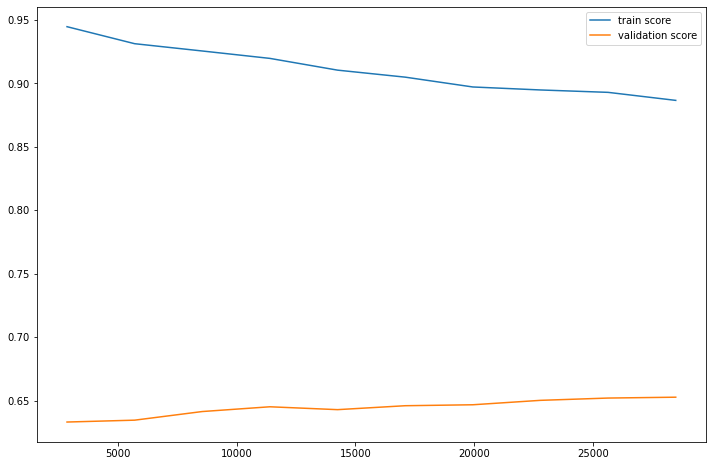

In [ ]:
evaluation(rf_random.best_estimator_)